In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
import warnings
warnings.filterwarnings("ignore")

In [2]:
cars =  pd.read_csv("C:\\Users\\Dell\\OneDrive\\Desktop\\Nithya VB\\Project\\cars\\car data.csv")

In [3]:
cars.describe()

,Year,Owner,Present_Price,Kms_Driven,Selling_Price
count,301.000000,301.000000,301.000000,301.000000,301.000000
mean,2013.627907,0.043189,7.628472,36947.205980,4.661296
std,2.891554,0.247915,8.644115,38886.883882,5.082812
min,2003.000000,0.000000,0.320000,500.000000,0.100000
25%,2012.000000,0.000000,1.200000,15000.000000,0.900000
50%,2014.000000,0.000000,6.400000,32000.000000,3.600000
75%,2016.000000,0.000000,9.900000,48767.000000,6.000000
max,2018.000000,3.000000,92.600000,500000.000000,35.000000


In [4]:
cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Owner          301 non-null    int64  
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Seller_Type    301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Selling_Price  301 non-null    float64
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [5]:
def overlook(dataframe):
    print('The no. of null values in each column are:\n',cars.isnull().sum())
    return

overlook(cars)

The no. of null values in each column are:
 Car_Name         0
Year             0
Owner            0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Selling_Price    0
dtype: int64


In [6]:
## selecting all categorical variable columns
categorical_columns = cars.dtypes[cars.dtypes == 'object'].index
print(categorical_columns)

Index(['Car_Name', 'Fuel_Type', 'Seller_Type', 'Transmission'], dtype='object')


In [7]:
cars.shape

(301, 9)

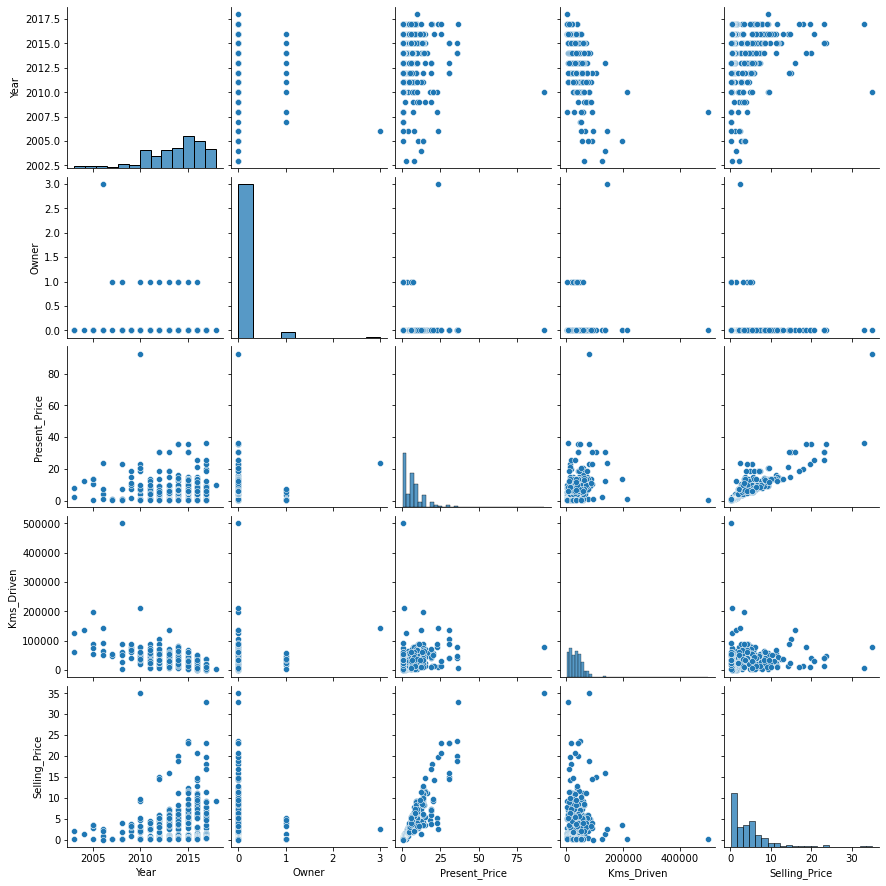

In [8]:
sns.pairplot(cars)

## EDA

<AxesSubplot:xlabel='Fuel_Type', ylabel='count'>

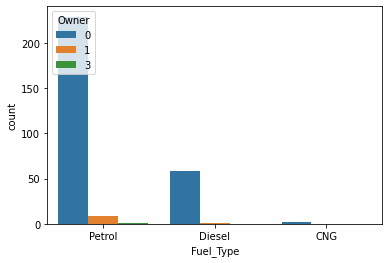

In [9]:
sns.countplot(x='Fuel_Type', hue="Owner", data = cars)

### here we can see that 96% of first owner prefers buy petrol cars.

<AxesSubplot:xlabel='Car_Name', ylabel='count'>

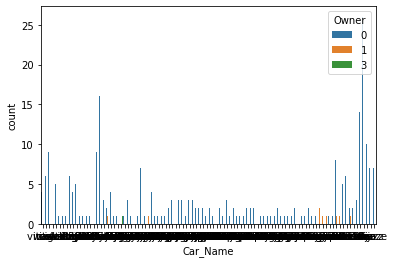

In [10]:
sns.countplot(x="Car_Name",hue = "Owner", data = cars)

In [11]:
cars.Car_Name.describe()

count      301
unique      98
top       city
freq        26
Name: Car_Name, dtype: object

<AxesSubplot:xlabel='Fuel_Type', ylabel='count'>

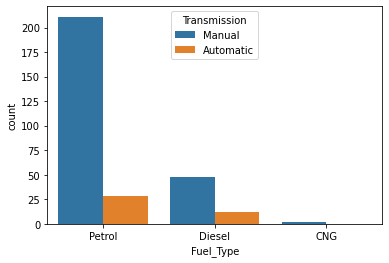

In [12]:
sns.countplot(x='Fuel_Type', hue="Transmission", data = cars)

### Here we can see only 1 manual transmission is of CNG fuel type.

<AxesSubplot:xlabel='Owner', ylabel='count'>

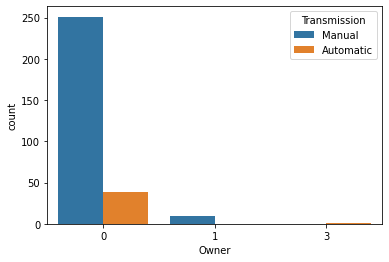

In [13]:
sns.countplot(x='Owner', hue="Transmission", data = cars)

###  96% of owners prefer to go with Manual transmission.

<AxesSubplot:xlabel='Fuel_Type', ylabel='Selling_Price'>

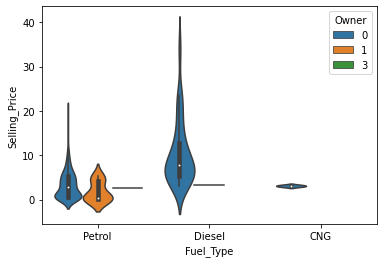

In [14]:
sns.violinplot(x='Fuel_Type', y="Selling_Price", hue ="Owner", data = cars)

### Diesel cars has the highest selling price which are been owned by first owners.


<AxesSubplot:xlabel='Fuel_Type', ylabel='Present_Price'>

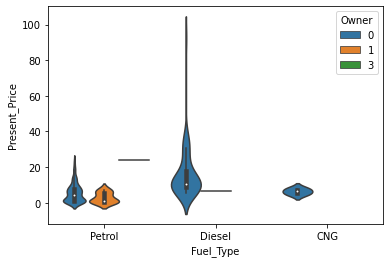

In [15]:
sns.violinplot(x='Fuel_Type', y="Present_Price", hue ="Owner", data = cars)

## Cars_Name

In [16]:
cars.Car_Name .value_counts()

city                        26
corolla altis               16
verna                       14
fortuner                    11
brio                        10
                            ..
Honda CB Trigger             1
Yamaha FZ S                  1
Bajaj Pulsar 135 LS          1
Activa 4g                    1
Bajaj Avenger Street 220     1
Name: Car_Name, Length: 98, dtype: int64

In [17]:
cars.Car_Name.describe

<bound method NDFrame.describe of 0         ritz
1          sx4
2         ciaz
3      wagon r
4        swift
        ...   
296       city
297       brio
298       city
299       city
300       brio
Name: Car_Name, Length: 301, dtype: object>

## Kms_driven

In [18]:
cars.Kms_Driven.value_counts()

45000    9
15000    9
40000    5
35000    5
50000    5
        ..
1400     1
1200     1
4100     1
21700    1
5464     1
Name: Kms_Driven, Length: 206, dtype: int64

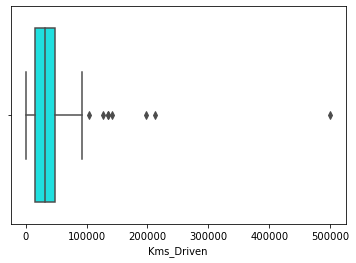

In [19]:
sns.boxplot(x=cars['Kms_Driven'], color = 'cyan');

In [20]:
dfw = cars['Kms_Driven']
dfw_Q1 = dfw.quantile(0.25)
dfw_Q3 = dfw.quantile(0.75)
dfw_IQR = dfw_Q3 - dfw_Q1
dfw_lowerend = dfw_Q1 - (1.5 * dfw_IQR)
dfw_upperend = dfw_Q3 + (1.5 * dfw_IQR)

In [21]:
dfw_outliers = dfw[(dfw < dfw_lowerend) | (dfw > dfw_upperend)]
dfw_outliers

37     127000
50     104707
53     135000
77     135154
84     197176
85     142000
179    213000
196    500000
Name: Kms_Driven, dtype: int64

In [22]:
cars.Kms_Driven = np.where(cars.Kms_Driven>dfw_upperend, dfw_upperend, cars.Kms_Driven)

Text(0.5, 1.0, 'Boxplot: Kms_Driven')

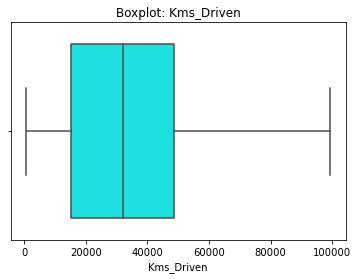

In [23]:
cars['Kms_Driven'] = cars['Kms_Driven'].astype('float64')
sns.boxplot(x=cars.Kms_Driven, color = 'cyan', orient= 'h')
plt.title("Boxplot: Kms_Driven")

Text(0.5, 1.0, 'Barplot of Kms_Driven')

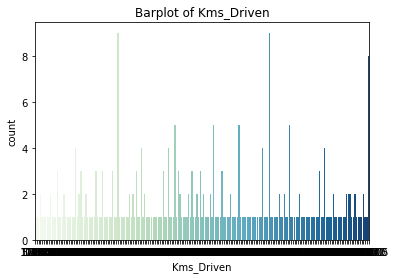

In [24]:
sns.countplot(x = 'Kms_Driven', data = cars, palette = 'GnBu')
plt.title('Barplot of Kms_Driven')

## Present_Price

In [25]:
cars.Present_Price.value_counts()

9.40     15
13.60    13
5.70      8
4.43      7
1.47      7
         ..
18.54     1
7.27      1
15.04     1
10.21     1
12.50     1
Name: Present_Price, Length: 147, dtype: int64

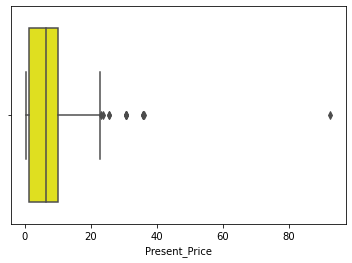

In [26]:
sns.boxplot(x=cars['Present_Price'], color = 'yellow');

In [27]:
dfw = cars['Present_Price']
dfw_Q1 = dfw.quantile(0.25)
dfw_Q3 = dfw.quantile(0.75)
dfw_IQR = dfw_Q3 - dfw_Q1
dfw_lowerend = dfw_Q1 - (1.5 * dfw_IQR)
dfw_upperend = dfw_Q3 + (1.5 * dfw_IQR)

In [28]:
dfw_outliers = dfw[(dfw < dfw_lowerend) | (dfw > dfw_upperend)]
dfw_outliers

50    30.61
51    30.61
53    30.61
59    35.96
62    35.96
63    35.96
64    36.23
66    23.15
79    30.61
82    25.39
85    23.73
86    92.60
93    30.61
96    25.39
Name: Present_Price, dtype: float64

In [29]:
cars.Present_Price = np.where(cars.Present_Price>dfw_upperend, dfw_upperend, cars.Present_Price)

Text(0.5, 1.0, 'Boxplot: Present_Price')

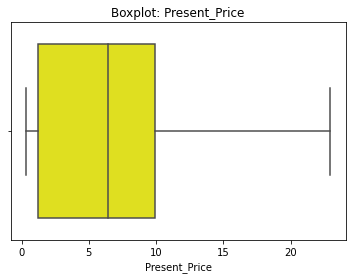

In [30]:
cars['Present_Price'] = cars['Present_Price'].astype('float64')
sns.boxplot(x=cars.Present_Price, color = 'yellow', orient= 'h')
plt.title("Boxplot: Present_Price")

Text(0.5, 1.0, 'Barplot of Present_Price')

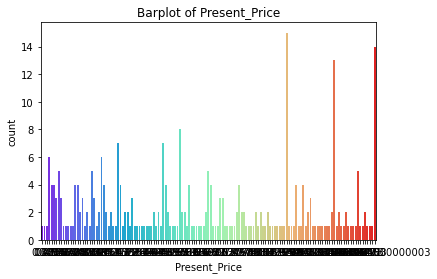

In [31]:
sns.countplot(x = 'Present_Price', data = cars, palette = 'rainbow')
plt.title('Barplot of Present_Price')

## Year

In [32]:
cars.Year.value_counts()

2015    61
2016    50
2014    38
2017    35
2013    33
2012    23
2011    19
2010    15
2008     7
2009     6
2006     4
2005     4
2003     2
2007     2
2018     1
2004     1
Name: Year, dtype: int64

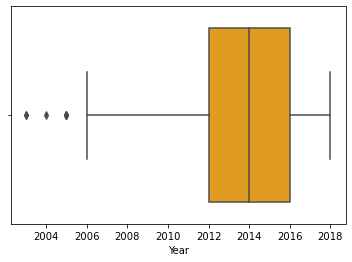

In [33]:
sns.boxplot(x=cars['Year'], color = 'orange');

In [34]:
dfw = cars['Year']
dfw_Q1 = dfw.quantile(0.25)
dfw_Q3 = dfw.quantile(0.75)
dfw_IQR = dfw_Q3 - dfw_Q1
dfw_lowerend = dfw_Q1 - (1.5 * dfw_IQR)
dfw_upperend = dfw_Q3 + (1.5 * dfw_IQR)

In [35]:
dfw_outliers = dfw[(dfw < dfw_lowerend) | (dfw > dfw_upperend)]
dfw_outliers

37     2003
39     2003
54     2005
77     2004
84     2005
92     2005
189    2005
Name: Year, dtype: int64

In [36]:
dfw = cars.drop([37,39,54,77,84,92,189])

Text(0.5, 1.0, 'Boxplot: Year')

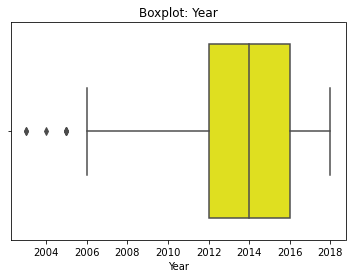

In [37]:
cars['Year'] = cars['Year'].astype('float64')
sns.boxplot(x=cars.Year, color = 'yellow', orient= 'h')
plt.title("Boxplot: Year")

Text(0.5, 1.0, 'Barplot of Year')

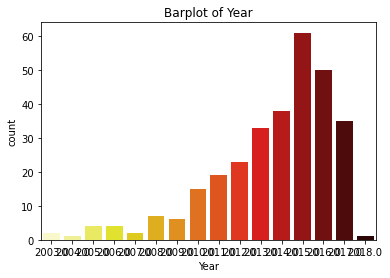

In [38]:
sns.countplot(x = 'Year', data = cars, palette = 'hot_r')
plt.title('Barplot of Year')

##  Selling_Price

In [39]:
cars.Selling_Price.value_counts()

0.45     8
0.60     8
5.25     7
4.50     7
0.20     6
        ..
3.80     1
3.45     1
5.90     1
35.00    1
11.50    1
Name: Selling_Price, Length: 156, dtype: int64

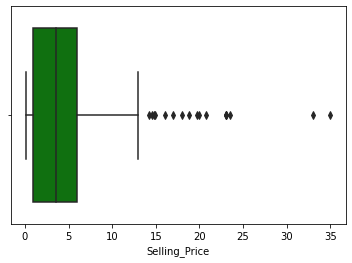

In [40]:
sns.boxplot(x=cars['Selling_Price'], color = 'green');

In [41]:
dfw = cars['Selling_Price']
dfw_Q1 = dfw.quantile(0.25)
dfw_Q3 = dfw.quantile(0.75)
dfw_IQR = dfw_Q3 - dfw_Q1
dfw_lowerend = dfw_Q1 - (1.5 * dfw_IQR)
dfw_upperend = dfw_Q3 + (1.5 * dfw_IQR)

In [42]:
dfw_outliers = dfw[(dfw < dfw_lowerend) | (dfw > dfw_upperend)]
dfw_outliers

50    14.90
51    23.00
52    18.00
53    16.00
59    19.99
62    18.75
63    23.50
64    33.00
66    19.75
69    14.25
79    14.50
80    14.73
82    23.00
86    35.00
93    23.00
96    20.75
97    17.00
Name: Selling_Price, dtype: float64

In [43]:
cars.Selling_Price = np.where(cars.Selling_Price>dfw_upperend, dfw_upperend, cars.Selling_Price)

Text(0.5, 1.0, 'Boxplot: Selling_Price')

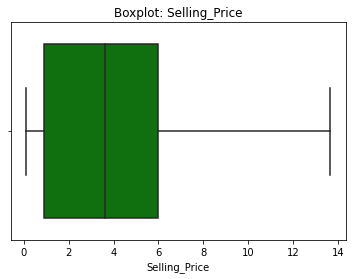

In [44]:
cars['Selling_Price'] = cars['Selling_Price'].astype('float64')
sns.boxplot(x=cars.Selling_Price, color = 'green', orient= 'h')
plt.title("Boxplot: Selling_Price")

## Owner

In [45]:
cars.Owner.value_counts()

0    290
1     10
3      1
Name: Owner, dtype: int64

Text(0.5, 1.0, 'Barplot of Owner')

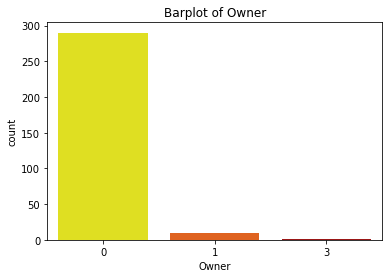

In [46]:
sns.countplot(x = 'Owner', data = cars, palette = 'hot_r')
plt.title('Barplot of Owner')

## Fuel_Type

In [47]:
cars.Fuel_Type.value_counts()

Petrol    239
Diesel     60
CNG         2
Name: Fuel_Type, dtype: int64

In [48]:
le = preprocessing.LabelEncoder()
cars['Fuel_Type'] = le.fit_transform(cars.Fuel_Type.values)

Text(0.5, 1.0, 'Barplot of Fuel_Type')

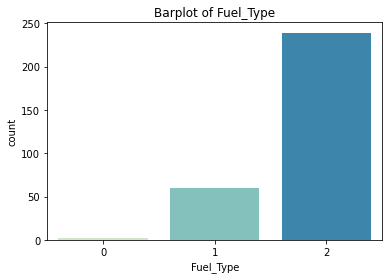

In [49]:
sns.countplot(x = 'Fuel_Type', data = cars, palette = 'GnBu')
plt.title('Barplot of Fuel_Type')

## Seller_Type

In [50]:
cars.Seller_Type.value_counts()

Dealer        195
Individual    106
Name: Seller_Type, dtype: int64

In [51]:
le = preprocessing.LabelEncoder()
cars['Seller_Type'] = le.fit_transform(cars.Seller_Type.values)

Text(0.5, 1.0, 'Barplot of Seller_Type')

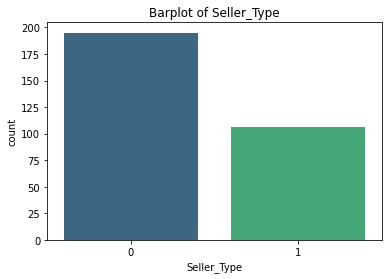

In [52]:
sns.countplot(x = 'Seller_Type', data = cars, palette = 'viridis')
plt.title('Barplot of Seller_Type')

## Transmission

In [53]:
cars.Transmission.value_counts()

Manual       261
Automatic     40
Name: Transmission, dtype: int64

In [54]:
le = preprocessing.LabelEncoder()
cars['Transmission'] = le.fit_transform(cars.Transmission.values)

Text(0.5, 1.0, 'Barplot of Transmission')

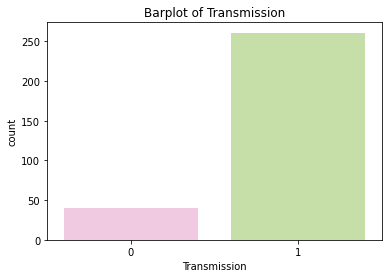

In [55]:
sns.countplot(x = 'Transmission', data = cars, palette = 'PiYG')
plt.title('Barplot of Transmission')

In [56]:
cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    float64
 2   Owner          301 non-null    int64  
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    float64
 5   Fuel_Type      301 non-null    int32  
 6   Seller_Type    301 non-null    int32  
 7   Transmission   301 non-null    int32  
 8   Selling_Price  301 non-null    float64
dtypes: float64(4), int32(3), int64(1), object(1)
memory usage: 17.8+ KB


In [57]:
cars = cars.drop(['Car_Name'], axis = 1)

## Corelation

In [58]:
countinue_column = cars.select_dtypes(include= 'number')

In [59]:
print(countinue_column)

       Year  Owner  Present_Price  Kms_Driven  Fuel_Type  Seller_Type  \
0    2014.0      0           5.59     27000.0          2            0   
1    2013.0      0           9.54     43000.0          1            0   
2    2017.0      0           9.85      6900.0          2            0   
3    2011.0      0           4.15      5200.0          2            0   
4    2014.0      0           6.87     42450.0          1            0   
..      ...    ...            ...         ...        ...          ...   
296  2016.0      0          11.60     33988.0          1            0   
297  2015.0      0           5.90     60000.0          2            0   
298  2009.0      0          11.00     87934.0          2            0   
299  2017.0      0          12.50      9000.0          1            0   
300  2016.0      0           5.90      5464.0          2            0   

     Transmission  Selling_Price  
0               1           3.35  
1               1           4.75  
2               1 

In [60]:
countinue_column.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Year           301 non-null    float64
 1   Owner          301 non-null    int64  
 2   Present_Price  301 non-null    float64
 3   Kms_Driven     301 non-null    float64
 4   Fuel_Type      301 non-null    int32  
 5   Seller_Type    301 non-null    int32  
 6   Transmission   301 non-null    int32  
 7   Selling_Price  301 non-null    float64
dtypes: float64(4), int32(3), int64(1)
memory usage: 15.4 KB


In [61]:
countinue_column.corr()

,Year,Owner,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Selling_Price
Year,1.000000,-0.182104,-0.033008,-0.640598,-0.053643,-0.039896,0.000394,0.281617
Owner,-0.182104,1.000000,0.021850,0.092399,0.055705,0.124269,-0.050316,-0.101629
Present_Price,-0.033008,0.021850,1.000000,0.386580,-0.452857,-0.661626,-0.370795,0.871568
Kms_Driven,-0.640598,0.092399,0.386580,1.000000,-0.280866,-0.269800,-0.093247,0.127841
Fuel_Type,-0.053643,0.055705,-0.452857,-0.280866,1.000000,0.352415,0.080466,-0.519169
Seller_Type,-0.039896,0.124269,-0.661626,-0.269800,0.352415,1.000000,0.063240,-0.674330
Transmission,0.000394,-0.050316,-0.370795,-0.093247,0.080466,0.063240,1.000000,-0.301243
Selling_Price,0.281617,-0.101629,0.871568,0.127841,-0.519169,-0.674330,-0.301243,1.000000


<AxesSubplot:>

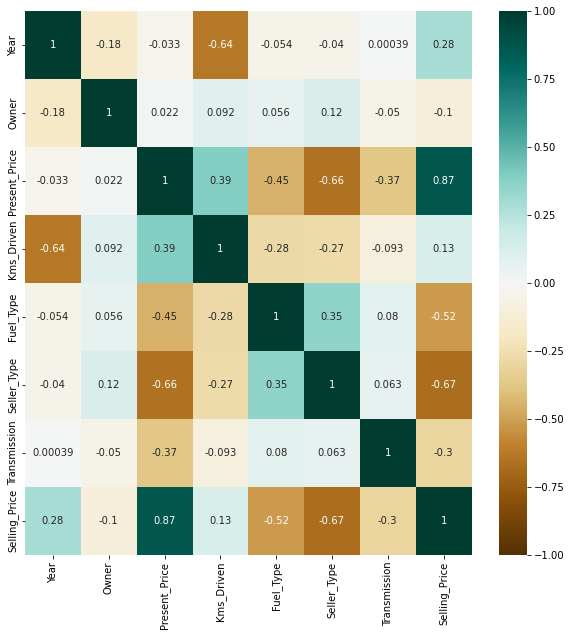

In [62]:
plt.figure(figsize=(10,10))
sns.heatmap(countinue_column.corr(), annot=True, vmin= -1, vmax=1, cmap = 'BrBG')

In [63]:
X = cars.iloc[:, cars.columns != 'Selling_Price']
y = cars.iloc[:, cars.columns == 'Selling_Price']

In [64]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [65]:
X_train.shape

(240, 7)

In [66]:
y_train.shape

(240, 1)

In [67]:
y_train

,Selling_Price
74,4.90
239,2.00
64,13.65
294,3.75
286,5.65
...,...
251,5.00
192,0.20
117,1.10
47,1.05


In [68]:
y_test

,Selling_Price
223,8.25
150,0.50
226,5.25
296,9.50
52,13.65
...,...
137,0.65
227,2.55
26,4.15
106,1.35


In [69]:
lr = LinearRegression()

In [70]:
lr.fit(X_train, y_train)

LinearRegression()

In [71]:
y_pred = lr.predict(X_test)


In [72]:
# Compute the mean squared error
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

Mean Squared Error: 1.2044409355799783


In [73]:
# Compute the R^2 score
score = r2_score(y_test, y_pred)
print("R^2 Score:", score)

R^2 Score: 0.9172233787842372
